In [1]:
#Подключаем  библиотеки 
import pandas as pd
import numpy as np

from datetime import timedelta
from datetime import datetime
from calendar import monthrange

import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

#### в приложенном файле хранятся данные об активности клиентов с сентября 2021 года по февраль 2022
Необходимо на основе этих данных провести когортный анализ

Описание полей: 

CLIENT_ID - идентификатор клиента; 

VALUE_DAY - отчетная дата; 

DIGITAL_30_CNT - кол-во входов в мобильное приложение за последние 30 дней на отчетную дату; 

TRAN_ACTIVE_30_CNT - кол-во транзакций в мобильном приложении за последние 30 дней на отчетную дату; 

OPER_ACTIVE_30_CNT - кол-во операций (транзакции+нефинансовые операции) в мобильном приложении за последние 30 дней на отчетную дату

●	постройте визуальное представление удержания клиентов в статусе:
  ○	 активных клиентов банка (наличие строки для клиента на отчетную дату); 
  ○	диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);
  ○	операционно активных;
  ○	транзакционно активных;
●	какие выводы можно сделать на основе этих данных?;
●	если построить проникновение транзакционно активных клиентов в когорты диджитал активных клиентов, то мы увидим, 
что существенная часть клиентов использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем.
Какие гипотезы такого поведения можно предположить? Как их можно проверить ?;

●	как можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал активных?


In [2]:
#Загружаем файлы для анализа
data= pd.read_csv('https://raw.githubusercontent.com/Propsih/test/main/data_test.csv ', 
                  sep=';', 
                  parse_dates=['VALUE_DAY']) 
data

C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30.09.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '31.10.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30.11.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '31.12.2021' in DD/MM/YYYY format. Provide format or specify in

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,2021-09-30,18.0,8.0,9.0
1,181778433,2021-09-30,7.0,3.0,3.0
2,4271531990,2021-09-30,2.0,0.0,0.0
3,3949165697,2021-09-30,15.0,4.0,5.0
4,1926920317,2021-09-30,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0
805817,67461867,2022-02-28,3.0,0.0,0.0
805818,302417315,2022-02-28,NaN,NaN,NaN
805819,1780553365,2022-02-28,4.0,0.0,2.0


In [3]:
# Посмотрим на количество пропущенных значений
data.isna().sum()

CLIENT_ID                 0
VALUE_DAY                 0
DIGITAL_30_CNT        94652
TRAN_ACTIVE_30_CNT    94652
OPER_ACTIVE_30_CNT    94652
dtype: int64

In [4]:
data.dtypes # тип данных 

CLIENT_ID                      int64
VALUE_DAY             datetime64[ns]
DIGITAL_30_CNT               float64
TRAN_ACTIVE_30_CNT           float64
OPER_ACTIVE_30_CNT           float64
dtype: object

In [5]:
# определение когорт по месяцу первой транзакции клиента
data['COHORT_MONTH'] = data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min').dt.to_period('M')

In [6]:
# определение месяца для каждой транзакции
data['TRANSACTION_MONTH'] =data['VALUE_DAY'].dt.to_period('M')
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,COHORT_MONTH,TRANSACTION_MONTH
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09,2021-09
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09,2021-09
2,4271531990,2021-09-30,2.0,0.0,0.0,2021-09,2021-09
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09,2021-09
4,1926920317,2021-09-30,3.0,0.0,0.0,2021-09,2021-09
...,...,...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0,2021-09,2022-02
805817,67461867,2022-02-28,3.0,0.0,0.0,2021-09,2022-02
805818,302417315,2022-02-28,NaN,NaN,NaN,2021-09,2022-02
805819,1780553365,2022-02-28,4.0,0.0,2.0,2022-01,2022-02


In [7]:
# определение размера когорты
cohort_data = data.groupby(['COHORT_MONTH', 'TRANSACTION_MONTH']).agg(n_customers=('CLIENT_ID', 'nunique')).reset_index()
cohort_data['PERIOD_NUMBER'] = (cohort_data['TRANSACTION_MONTH'] - cohort_data['COHORT_MONTH']).apply(lambda x: x.n)
cohort_data

,COHORT_MONTH,TRANSACTION_MONTH,n_customers,PERIOD_NUMBER
0,2021-09,2021-09,129232,0
1,2021-09,2021-10,124593,1
2,2021-09,2021-11,120232,2
3,2021-09,2021-12,116456,3
4,2021-09,2022-01,105547,4
5,2021-09,2022-02,104163,5
6,2021-10,2021-10,7044,0
7,2021-10,2021-11,6936,1
8,2021-10,2021-12,6883,2
9,2021-10,2022-01,5040,3


In [8]:
# расчет retention rate
cohort_data = cohort_data.pivot_table(index='COHORT_MONTH',
                                      columns='PERIOD_NUMBER',
                                      values='n_customers')
cohort_size = cohort_data.iloc[:, 0]
retention_matrix = cohort_data.divide(cohort_size, axis=0)

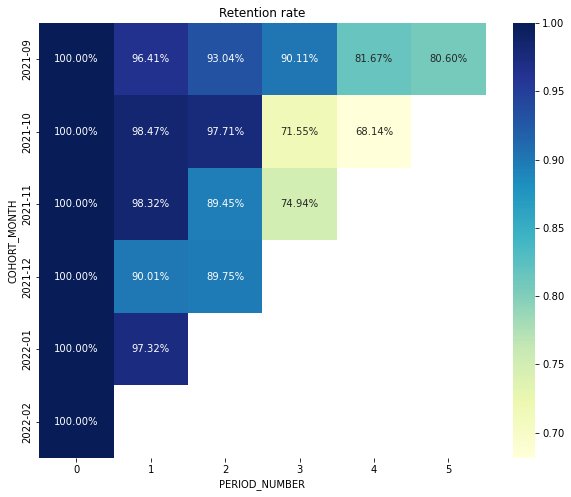

In [9]:
# визуализация retention rate
plt.figure(figsize=(10, 8))
plt.title('Retention rate')
sns.heatmap(retention_matrix, annot=True, fmt='.2%', cmap='YlGnBu')
plt.show()

In [10]:
# визуализация активных клиентов
active_clients = data.groupby(['TRANSACTION_MONTH']).agg(active_clients=('CLIENT_ID', 'nunique')).reset_index()
active_clients

,TRANSACTION_MONTH,active_clients
0,2021-09,129232
1,2021-10,131637
2,2021-11,133009
3,2021-12,135957
4,2022-01,136770
5,2022-02,139214


In [11]:
active_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   TRANSACTION_MONTH  6 non-null      period[M]
 1   active_clients     6 non-null      int64    
dtypes: int64(1), period[M](1)
memory usage: 224.0 bytes


In [12]:
active_clients['TRANSACTION_MONTH'] = active_clients['TRANSACTION_MONTH'].astype(str)
active_clients['TRANSACTION_MONTH'] = pd.to_datetime(active_clients['TRANSACTION_MONTH'])
active_clients.dtypes

TRANSACTION_MONTH    datetime64[ns]
active_clients                int64
dtype: object

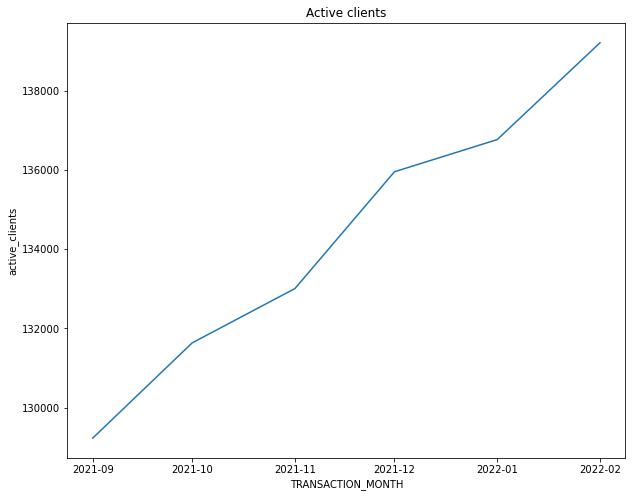

In [13]:
# визуализация активных клиентов
plt.figure(figsize=(10, 8))
plt.title('Active clients')
sns.lineplot(x='TRANSACTION_MONTH', y='active_clients', data = active_clients)
plt.show()

In [14]:
# визуализация digital-активных клиентов
digital_active = data[data['DIGITAL_30_CNT'] > 0]
digital_active_clients = digital_active.groupby(['TRANSACTION_MONTH']).agg(digital_active_clients=('CLIENT_ID', 'nunique')).reset_index()

In [15]:
digital_active_clients['TRANSACTION_MONTH'] = digital_active_clients['TRANSACTION_MONTH'].astype(str)
digital_active_clients['TRANSACTION_MONTH'] = pd.to_datetime(digital_active_clients['TRANSACTION_MONTH'])
active_clients.dtypes

TRANSACTION_MONTH    datetime64[ns]
active_clients                int64
dtype: object

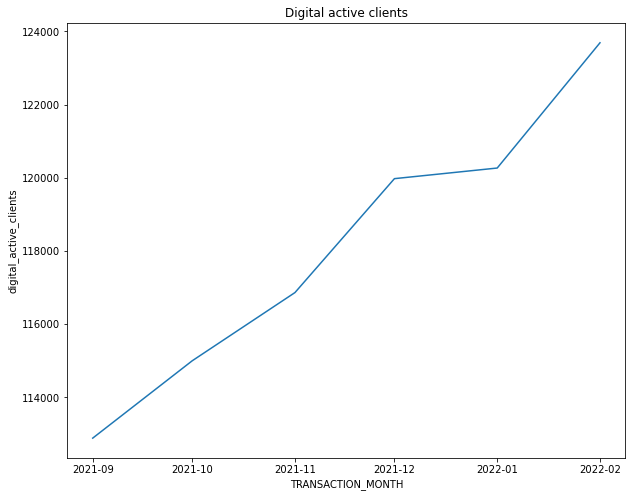

In [16]:
plt.figure(figsize=(10, 8))
plt.title('Digital active clients')
sns.lineplot(x='TRANSACTION_MONTH', y='digital_active_clients', data=digital_active_clients)
plt.show()

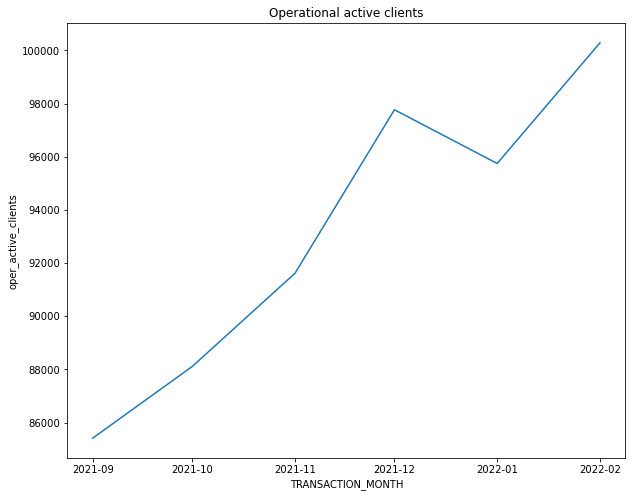

In [17]:
# визуализация операционно активных клиентов
oper_active = data[data['OPER_ACTIVE_30_CNT'] > 0] 
oper_active_clients = oper_active.groupby(['TRANSACTION_MONTH'])\
    .agg(oper_active_clients=('CLIENT_ID', 'nunique'))\
    .reset_index() 

oper_active_clients['TRANSACTION_MONTH'] = oper_active_clients['TRANSACTION_MONTH'].astype(str)
oper_active_clients['TRANSACTION_MONTH'] = pd.to_datetime(oper_active_clients['TRANSACTION_MONTH'])
oper_active_clients.dtypes

plt.figure(figsize=(10, 8)) 
plt.title('Operational active clients') 
sns.lineplot(x='TRANSACTION_MONTH', y='oper_active_clients', data=oper_active_clients) 
plt.show()

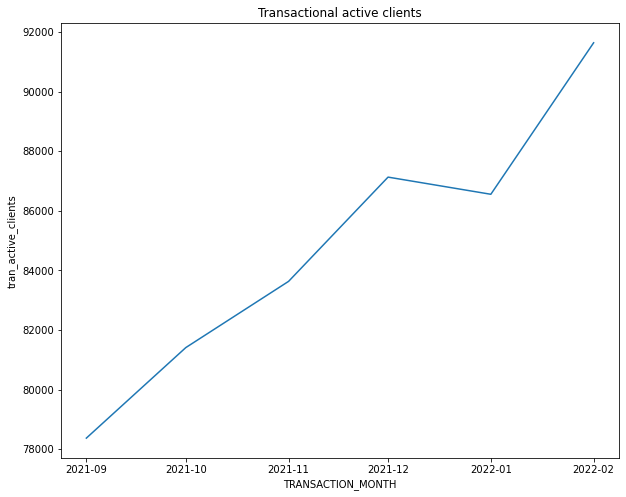

In [18]:
#визуализация транзакционно активных клиентов
tran_active = data[data['TRAN_ACTIVE_30_CNT'] > 0] 
tran_active_clients = tran_active.groupby(['TRANSACTION_MONTH'])\
    .agg(tran_active_clients=('CLIENT_ID', 'nunique')).reset_index() 

tran_active_clients['TRANSACTION_MONTH'] = tran_active_clients['TRANSACTION_MONTH'].astype(str)
tran_active_clients['TRANSACTION_MONTH'] = pd.to_datetime(tran_active_clients['TRANSACTION_MONTH'])
tran_active_clients.dtypes

plt.figure(figsize=(10, 8)) 
plt.title('Transactional active clients') 
sns.lineplot(x='TRANSACTION_MONTH', y='tran_active_clients', data=tran_active_clients) 
plt.show()

## Выводы 

### 1. Из данных можно сделать следующие выводы:

• Количество транзакционно активных клиентов увеличивается со временем, однако рост не является стабильным и может зависеть от сезонности.

• Отношение количества активных клиентов в каждую когорту к первоначальному количеству клиентов показывает, что клиенты, присоединившиеся в более ранние когорты, имеют более высокий retention rate, чем клиенты, присоединившиеся в более поздние когорты.

• Количество digital-активных клиентов также увеличивается со временем, однако оно значительно ниже, чем количество транзакционно активных клиентов. Это может свидетельствовать о том, что многие клиенты не используют мобильное приложение для совершения транзакций.
### 2. Если построить проникновение транзакционно активных клиентов в когорты диджитал активных клиентов, то мы увидим, что существенная часть клиентов использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем.
Гипотезы о том, почему многие клиенты используют мобильное приложение, но не совершают транзакции в нем, могут быть следующими:

• Клиенты могут использовать мобильное приложение для просмотра баланса и истории транзакций, но предпочитают совершать транзакции через другие каналы, например, через Интернет-банк или в отделении банка.

• Мобильное приложение может быть неудобным для совершения транзакций, например, из-за ограничений в функционале или сложности в использовании.

• Клиенты могут не доверять мобильному приложению или опасаться потери денег при совершении транзакций через мобильное приложение.
Для проверки этих гипотез можно провести опрос клиентов, чтобы понять :

-почему они не совершают транзакции через мобильное приложение ?

-какие могут быть причины такого поведения?
### 3. Для увеличения проникновения транзакционно активных клиентов в digital-активных клиентов можно предпринять следующие меры:

• Улучшить функционал мобильного приложения, чтобы клиенты могли совершать все необходимые транзакции через него и не приходилось использовать другие каналы.

• Разработать более удобный и интуитивно понятный интерфейс мобильного приложения для клиентов, который будет стимулировать их использовать его для совершения транзакций.

• Произвести рекламную кампанию в цифровых каналах для привлечения новых клиентов, которые будут использовать мобильное приложение не только для просмотра баланса и перевода денег на другие карты, но и для оплаты товаров и услуг в интернете.

• Внедрить новые функциональные возможности мобильного приложения, которые будут стимулировать клиентов к использованию его для совершения транзакций. Например, внедрить систему кэшбэков или скидок за оплату товаров и услуг через приложение, предоставлять дополнительные возможности для управления картой и счетом в приложении.

• Произвести обучение клиентов использованию мобильного приложения для совершения транзакций, например, провести онлайн-вебинары или создать обучающие видеоуроки.
### В целом, для увеличения проникновения транзакционно активных клиентов в диджитал активные необходимо проводить комплексную работу, включающую не только технические усовершенствования приложения, но и маркетинговые мероприятия и обучение клиентов.

